In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import datetime

In [6]:
def plot_pollutant(dates, pollutants, variable, Titulo):
  # Convertir las fechas a objetos datetime
  fechas_datetime = [datetime.strptime(fecha, '%Y/%m/%d %H:%M') for fecha in dates]

  # Crear el gráfico
  plt.figure(figsize=(10, 6))

  # Graficar el target y las predicciones en el eje Y
  for pollutant in pollutants:
    plt.plot(fechas_datetime, pollutant, label='Predicciones', marker='o')

  # Configurar formato de fecha en el eje X
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))

  # Rotar las fechas para mayor legibilidad
  plt.gcf().autofmt_xdate()

  yaxis='Valor de'+ str(variable)
  # Configurar etiquetas y título
  plt.xlabel('Fecha')
  plt.ylabel(yaxis)
  plt.title(Titulo)

  # Mostrar la leyenda
  plt.legend()
  plt.grid(True)
  # Mostrar el gráfico
  plt.show()

In [3]:
df = pd.read_csv("C:/Users/valer/Documents/CIC/doctorado/A24/Tesis/entrenamiento datos por estacion/AJM.csv")
df[["year", "month", "day"]] = df["date"].str.split('/', expand=True)
months_name = {"01":"Ene", "02":"Feb", "03":"Mar", "04":"Abr", "05":"May", "06":"Jun", "07":"Jul", "08":"Ago", "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dic"}
df["mes"] = df["month"].map(months_name)
df

,date,CO,NO,NOX,NO2,O3,PM10,PM25,RH,SO2,TMP,WDR,WSP,year,month,day,mes
0,2015/01/01 00:00,0.10,0.0,5.0,5.0,32.0,NaN,NaN,NaN,1.0,NaN,192.0,7.3,2015,01,01 00:00,Ene
1,2015/01/01 01:00,1.20,3.0,61.0,58.0,8.0,NaN,NaN,NaN,20.0,NaN,180.0,1.3,2015,01,01 01:00,Ene
2,2015/01/01 02:00,1.40,13.0,71.0,58.0,2.0,NaN,NaN,NaN,9.0,NaN,144.0,1.7,2015,01,01 02:00,Ene
3,2015/01/01 03:00,1.30,8.0,59.0,52.0,3.0,NaN,NaN,NaN,6.0,NaN,168.0,1.5,2015,01,01 03:00,Ene
4,2015/01/01 04:00,1.10,4.0,45.0,40.0,6.0,NaN,NaN,NaN,9.0,NaN,153.0,1.7,2015,01,01 04:00,Ene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108127,2024/02/29 19:00,0.38,0.0,6.0,6.0,72.0,31.0,9.0,26.0,2.0,17.0,196.0,NaN,2024,02,29 19:00,Feb
108128,2024/02/29 20:00,0.41,0.0,5.0,6.0,71.0,38.0,8.0,31.0,2.0,15.0,260.0,6.0,2024,02,29 20:00,Feb
108129,2024/02/29 21:00,0.66,2.0,26.0,25.0,49.0,32.0,10.0,33.0,2.0,14.0,6.0,1.6,2024,02,29 21:00,Feb
108130,2024/02/29 22:00,0.62,0.0,21.0,21.0,50.0,37.0,18.0,36.0,3.0,13.0,7.0,1.6,2024,02,29 22:00,Feb


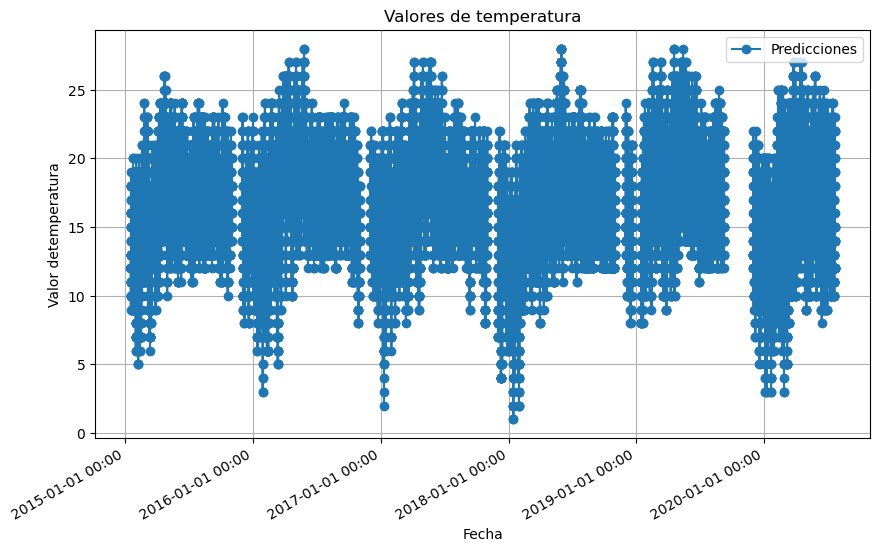

In [34]:
df_1 = df[df["year"]<="2021"]
#df_1= df_1[df_1["year"]<="2023"]
plot_pollutant(df_1["date"], df_1["TMP"], "temperatura", "Valores de temperatura")

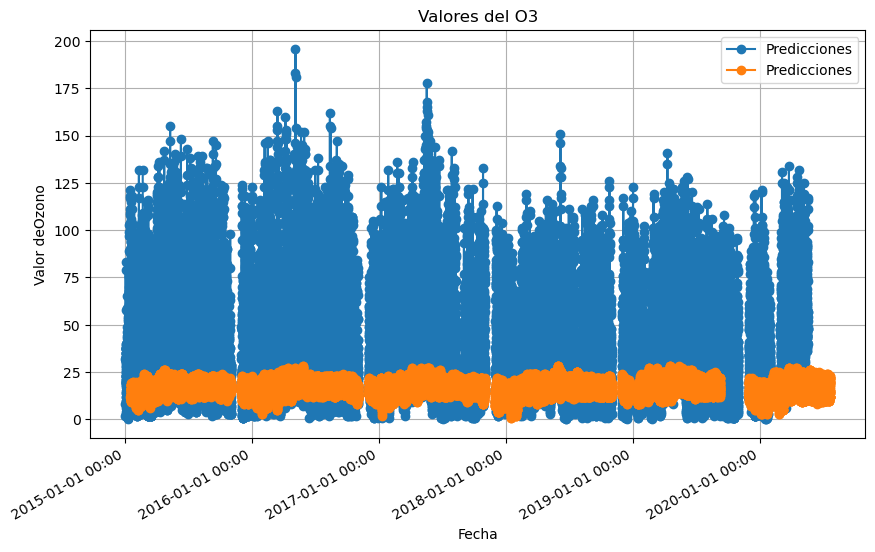

In [10]:
df_1 = df[df["year"]<="2021"]
#df_1= df_1[df_1["year"]<="2023"]
plot_pollutant(df_1["date"], [df_1["O3"], df_1["TMP"]], "Ozono", "Valores del O3")

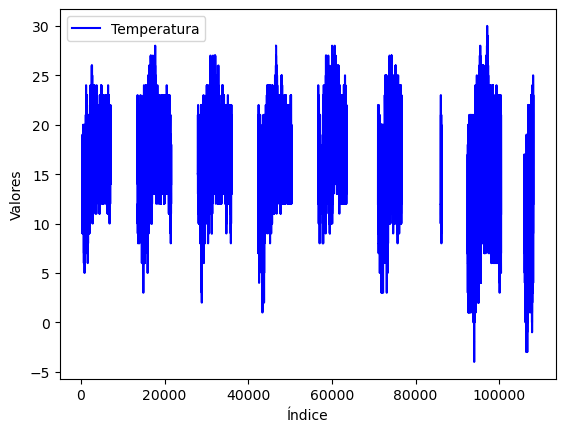

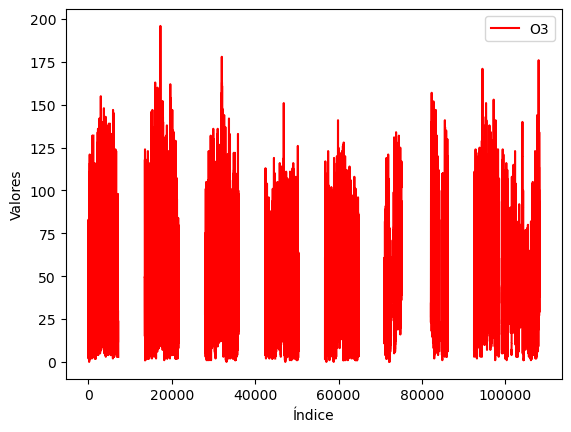

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar las columnas específicas
plt.plot(df['TMP'], label='Temperatura', color='blue')
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.show()


plt.plot(df['O3'], label='O3', color='red')
plt.legend()
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.show()

In [43]:
import geopandas as gpd

# Cargar el archivo .shp
shp_file_path = "C:/Users/valer/Downloads/poligonos_alcaldias_cdmx/poligonos_alcaldias_cdmx.shp"
gdf = gpd.read_file(shp_file_path)
gdf

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,zona_activ,zona_act_1,geometry
0,09002,09,002,Azcapotzalco,NE,NO,"POLYGON ((-99.18231 19.50748, -99.18229 19.507..."
1,09003,09,003,Coyoacán,SO,SO,"POLYGON ((-99.13427 19.35654, -99.13397 19.356..."
2,09004,09,004,Cuajimalpa de Morelos,SO,SO,"POLYGON ((-99.25738 19.40112, -99.25698 19.400..."
3,09005,09,005,Gustavo A. Madero,NE,NE,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
4,09006,09,006,Iztacalco,CE,CE,"POLYGON ((-99.05751 19.40673, -99.05753 19.406..."
5,09007,09,007,Iztapalapa,SE,SE,"POLYGON ((-99.01692 19.38187, -99.01652 19.381..."
6,09008,09,008,La Magdalena Contreras,SO,SO,"POLYGON ((-99.20819 19.33674, -99.20859 19.336..."
7,09009,09,009,Milpa Alta,SE,SE,"POLYGON ((-98.99718 19.22747, -98.99723 19.227..."
8,09010,09,010,Álvaro Obregón,SO,SO,"POLYGON ((-99.18906 19.39559, -99.18871 19.394..."
9,09011,09,011,Tláhuac,SE,SE,"POLYGON ((-98.97881 19.32392, -98.97856 19.323..."


In [47]:
gdf["zona_activ"] = gdf["zona_act_1"]
del gdf["zona_act_1"]
gdf

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,zona_activ
0,09002,09,002,Azcapotzalco,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",NO
1,09003,09,003,Coyoacán,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",SO
2,09004,09,004,Cuajimalpa de Morelos,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",SO
3,09005,09,005,Gustavo A. Madero,"POLYGON ((-99.11124 19.56150, -99.11485 19.557...",NE
4,09006,09,006,Iztacalco,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",CE
5,09007,09,007,Iztapalapa,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",SE
6,09008,09,008,La Magdalena Contreras,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",SO
7,09009,09,009,Milpa Alta,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",SE
8,09010,09,010,Álvaro Obregón,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",SO
9,09011,09,011,Tláhuac,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",SE


In [41]:

# Crear una nueva columna con datos
nueva_columna_data = ["NO", "SO", "SO", "NE", "CE", "SE", "SO", "SE", "SO", "SE", "SO", "SE", "CE", "CE", "NO", "CE"]  # Datos para la nueva columna
gdf['zona_activacion'] = nueva_columna_data
gdf


,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,zona_activ,geometry,zona_activacion
0,09002,09,002,Azcapotzalco,NE,"POLYGON ((-99.18231 19.50748, -99.18229 19.507...",NO
1,09003,09,003,Coyoacán,SO,"POLYGON ((-99.13427 19.35654, -99.13397 19.356...",SO
2,09004,09,004,Cuajimalpa de Morelos,SO,"POLYGON ((-99.25738 19.40112, -99.25698 19.400...",SO
3,09005,09,005,Gustavo A. Madero,NE,"POLYGON ((-99.11124 19.56150, -99.11485 19.557...",NE
4,09006,09,006,Iztacalco,CE,"POLYGON ((-99.05751 19.40673, -99.05753 19.406...",CE
5,09007,09,007,Iztapalapa,SE,"POLYGON ((-99.01692 19.38187, -99.01652 19.381...",SE
6,09008,09,008,La Magdalena Contreras,SO,"POLYGON ((-99.20819 19.33674, -99.20859 19.336...",SO
7,09009,09,009,Milpa Alta,SE,"POLYGON ((-98.99718 19.22747, -98.99723 19.227...",SE
8,09010,09,010,Álvaro Obregón,SO,"POLYGON ((-99.18906 19.39559, -99.18871 19.394...",SO
9,09011,09,011,Tláhuac,SE,"POLYGON ((-98.97881 19.32392, -98.97856 19.323...",SE


In [48]:

# Guardar el DataFrame de GeoPandas con la nueva columna en un nuevo archivo .shp
#nuevo_shp_file_path = "ruta/a/tu/nuevo/archivo_con_nueva_columna.shp"
gdf.to_file(shp_file_path)